In [1]:
import hdbscan
import umap
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter
# bokeh basics
from bokeh.io import show, output_notebook
import numpy as np
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform
import bokeh.models as bmo
import random
import colorsys

In [2]:
df = pd.read_excel('Areas y población Mun_COL 2005_2017.xlsx').iloc[:-1,:]

In [3]:
df.head()

,DP,DPNOM,DPMP,MPIO,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,AREA EN KM2 CABECERA 2005,AREA EN KM2 CENTRO POBLADO 2005,AREA EN KM 2 RESTO 2005,AREA EN KM2 CABECERA 2017,AREA EN KM2 CENTRO POBLADO 2017,AREA EN KM 2 RESTO 2017
0,5,Antioquia,5001,Medellín,2214494,2175681,38813,2508452,2479990,28462,112.599136,3.333152,256.106044,109.980043,14.609643,242.850543
1,5,Antioquia,5002,Abejorral,20249,6271,13978,19096,6765,12331,1.153995,0.144522,505.945056,1.236794,0.106953,505.790367
2,5,Antioquia,5004,Abriaquí,2690,858,1832,2019,724,1295,0.531890,0.000000,287.578156,0.156826,0.029510,296.769644
3,5,Antioquia,5021,Alejandría,3816,1896,1920,3393,1804,1589,0.371011,0.000000,126.738351,0.399738,0.000000,128.532415
4,5,Antioquia,5030,Amagá,27155,14070,13085,29980,17174,12806,2.801529,0.130832,80.214944,1.509397,1.828286,80.794794


In [4]:
df.describe()

,DP,DPMP,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,AREA EN KM2 CABECERA 2005,AREA EN KM2 CENTRO POBLADO 2005,AREA EN KM 2 RESTO 2005,AREA EN KM2 CABECERA 2017,AREA EN KM2 CENTRO POBLADO 2017,AREA EN KM 2 RESTO 2017
count,1122.000000,1122.000000,1.122000e+03,1.122000e+03,1122.000000,1.122000e+03,1.122000e+03,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,38.282531,38716.410873,3.822513e+04,2.842184e+04,9803.291444,4.393192e+04,3.370415e+04,10227.770053,3.085113,0.456685,1013.052786,4.879983,0.915556,850.764482
std,26.588271,26574.905059,2.329032e+05,2.312218e+05,9926.745333,2.732377e+05,2.715673e+05,11762.363632,14.264436,1.105590,3211.782856,45.361030,1.756232,2937.666290
min,5.000000,5001.000000,0.000000e+00,0.000000e+00,0.000000,3.920000e+02,0.000000e+00,172.000000,0.000000,0.000000,0.000000,0.041805,0.000000,0.000000
25%,15.000000,15677.250000,6.817750e+03,1.693500e+03,4014.250000,6.697250e+03,1.911250e+03,3663.250000,0.306696,0.000000,127.820304,0.407813,0.050280,121.297972
50%,25.000000,25840.000000,1.251500e+04,4.158000e+03,7019.500000,1.357050e+04,5.013000e+03,6739.000000,0.697962,0.098596,280.058571,0.901225,0.310458,264.993219
75%,66.000000,66543.000000,2.384975e+04,1.079150e+04,12256.750000,2.685875e+04,1.319200e+04,12840.500000,1.805689,0.411744,706.791479,2.331975,0.965454,619.197173
max,99.000000,99773.000000,6.840116e+06,6.824507e+06,109982.000000,8.080734e+06,8.063991e+06,173143.000000,380.743770,14.012152,65560.804906,1432.794977,18.141420,65594.340099


# Visualization

First we will visualize the data

In [5]:
data = np.log(df.iloc[:, 4:].values + 1)
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

In [7]:
reducer = umap.UMAP(n_neighbors=20, min_dist=0.1)
embedding = reducer.fit_transform(scaled)

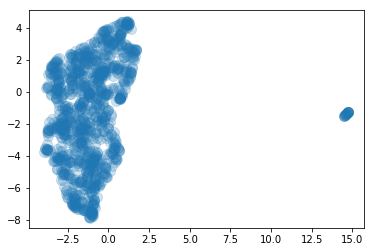

In [8]:
plt.scatter(*embedding.T, s=100, alpha=0.2)
plt.show()

In [9]:
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size')
])

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5)
output_file('log_raw_data.html')
show(p)

We see that only two groups are formed, and that the capital cities are not in a single clear group. This indicates that raw data must be complemented with more meaningful features.

## Adding new features

An initial thing to do is to add features that are important in measuring the expansion of a town. In particular we add new variables
\begin{align}
\rho_\text{year} &= \frac{\text{population in year}}{\text{area in year}}\\
\Delta \text{population} &= \text{population in 2017} - \text{population in 2005}\\
\Delta \text{area} &= \text{area in 2017} - \text{area in 2005}\\
C &= \frac{\Delta \text{population}}{\Delta \text{area}}
\end{align}

In [10]:
df['dens_2005_cab'] = df.iloc[:, 5].values/(df.iloc[:, 10].values + 1)
df['dens_2005_res'] = df.iloc[:, 6].values/(df.iloc[:, 12].values + 1)
df['dens_2017_cab'] = df.iloc[:, 8].values/(df.iloc[:, 13].values + 1)
df['dens_2017_res'] = df.iloc[:, 9].values/(df.iloc[:, 15].values + 1)

df['del_pop_tot'] = df.iloc[:, 7].values - df.iloc[:, 4].values
df['del_pop_cab'] = df.iloc[:, 8].values - df.iloc[:, 5].values
df['del_pop_res'] = df.iloc[:, 9].values - df.iloc[:, 6].values

df['del_are_cab'] = df.iloc[:, 13].values - df.iloc[:, 10].values
df['del_are_cen'] = df.iloc[:, 14].values - df.iloc[:, 11].values
df['del_are_res'] = df.iloc[:, 15].values - df.iloc[:, 12].values

df['c_cab'] = df['del_pop_cab'].values/df['del_are_cab'].values
df['c_res'] = df['del_pop_res'].values/df['del_are_res'].values

In [19]:
data = np.hstack((np.log(df.iloc[:, 4:16].values + 1), df.iloc[:, 16:]) )
#data = df.iloc[:, 4:]
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

In [20]:
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1)
embedding = reducer.fit_transform(scaled)

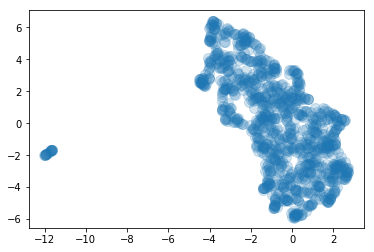

In [21]:
plt.scatter(*embedding.T, s=100, alpha=0.2)
plt.show()

In [22]:
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size')
])

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5)
output_file('log_data_with_features.html')
show(p)

# Unsupervised Clustering with HDBSCAN

In [68]:
import itertools

for pair in itertools.product(range(15, 30), range(1, 10)):
    mcs, ms = pair
    clusterer = hdbscan.HDBSCAN(min_cluster_size=mcs, min_samples=ms, allow_single_cluster=True)
    r = clusterer.fit(scaled)
    print(Counter(clusterer.labels_), mcs, ms)

Counter({1: 1084, -1: 19, 0: 19}) 15 1
Counter({1: 1081, -1: 22, 0: 19}) 15 2
Counter({1: 1079, -1: 25, 0: 18}) 15 3
Counter({1: 1075, -1: 29, 0: 18}) 15 4
Counter({0: 1079, -1: 26, 1: 17}) 15 5
Counter({0: 1078, -1: 27, 1: 17}) 15 6
Counter({0: 1077, -1: 30, 1: 15}) 15 7
Counter({-1: 1107, 0: 15}) 15 8
Counter({-1: 1101, 0: 21}) 15 9
Counter({1: 1084, -1: 19, 0: 19}) 16 1
Counter({1: 1081, -1: 22, 0: 19}) 16 2
Counter({1: 1079, -1: 25, 0: 18}) 16 3
Counter({1: 1075, -1: 29, 0: 18}) 16 4
Counter({0: 1079, -1: 26, 1: 17}) 16 5
Counter({0: 1078, -1: 27, 1: 17}) 16 6
Counter({-1: 1106, 0: 16}) 16 7
Counter({-1: 1106, 0: 16}) 16 8
Counter({-1: 1101, 0: 21}) 16 9
Counter({1: 1084, -1: 19, 0: 19}) 17 1
Counter({1: 1081, -1: 22, 0: 19}) 17 2
Counter({1: 1079, -1: 25, 0: 18}) 17 3
Counter({1: 1075, -1: 29, 0: 18}) 17 4
Counter({0: 1079, -1: 26, 1: 17}) 17 5
Counter({0: 1078, -1: 27, 1: 17}) 17 6
Counter({-1: 1095, 0: 27}) 17 7
Counter({-1: 1099, 0: 23}) 17 8
Counter({-1: 1101, 0: 21}) 17 9
Cou

This output shows that HDBSCAN cannot solve the problem efficiently. Therefore, we must use the heavy old weapons such as K-means and gap statistics.